In [1]:
import pandas as pd

In [111]:
df = pd.read_csv('twitch_log.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
27708,꼴픽이 (korpick2),대회 D-2 출격준비,시청자 492명,Teamfight Tactics,2022-09-29 17:30:05.272138
27709,중력 (jungryeok),트위치...,시청자 481명,Just Chatting,2022-09-29 17:30:05.272138
27710,청묘 (i_am_bloooo),누비 택티컬 처음해바요,시청자 469명,MapleStory,2022-09-29 17:30:05.272138
27711,heavyRainism,호우!,시청자 464명,Rogue: Genesia,2022-09-29 17:30:05.272138
27712,김챠멜 (charmel),디즈니 + 파크라이 + 엘든링,시청자 456명,Kena: Bridge of Spirits,2022-09-29 17:30:05.272138


In [112]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [113]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [114]:
df1 = df[df['시청자수'].str.find('만') > 0]
df1

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
49,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:05:04.699268
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),1만,Just Chatting,2022-09-27 19:05:04.699268
98,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:10:04.966996
99,한동숙 (handongsuk),발낳대 스크림,1만,VALORANT,2022-09-27 19:10:04.966996
...,...,...,...,...,...
27463,한동숙 (handongsuk),목요일,1.7만,Just Chatting,2022-09-29 17:10:05.397273
27513,한동숙 (handongsuk),목요일,1.7만,Just Chatting,2022-09-29 17:15:05.494233
27563,한동숙 (handongsuk),목요일,1.5만,Just Chatting,2022-09-29 17:20:05.304344
27613,한동숙 (handongsuk),목요일,1.5만,Just Chatting,2022-09-29 17:25:05.912965


In [115]:
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df2

0        14500.0
49       14500.0
50       10500.0
98       14500.0
99       10500.0
          ...   
27463    17500.0
27513    17500.0
27563    15500.0
27613    15500.0
27663    13500.0
Name: 시청자수, Length: 706, dtype: float64

In [116]:
df3 = df['시청자수']
df3 = df3.str.replace(',', '')
# # df[df3.str.find('L')>1]
# df3.iloc[:6687]
# df.iloc[6680:6690]

In [117]:
df.loc[df2.index, '시청자수'] = df2

In [118]:
# df.drop(6684, inplace=True)
df.drop(7190, inplace=True)

In [119]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)

In [120]:
df['시청자수'].iloc[7190:7200].astype(float)
df['시청자수']

0        14500.0
1           9687
2           9491
3           8103
4           8098
          ...   
27708        492
27709        481
27710        469
27711        464
27712        456
Name: 시청자수, Length: 27691, dtype: object

In [121]:
df['시청자수'] = df['시청자수'].astype(int)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27691 entries, 0 to 27712
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      27691 non-null  object
 1   제목      27691 non-null  object
 2   시청자수    27691 non-null  int32 
 3   카테고리    27691 non-null  object
 4   일시      27691 non-null  object
dtypes: int32(1), object(4)
memory usage: 1.2+ MB


In [123]:
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [124]:
df1 = df

In [135]:
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
아이네_ (vo_ine),17138.400000
우왁굳 (woowakgood),15488.444444
풍월량 (hanryang1125),13196.576923
한동숙 (handongsuk),11762.845588
괴물쥐123 (tmxk319),8676.339207
침착맨 (zilioner),8288.982759
릴파_ (lilpaaaaaa),7793.906977
랄로 (aba4647),7738.136364
비챤_ (viichan6),7313.540000


In [188]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
아이네_ (vo_ine),8시) 웃음참기 챌린지,4208,Just Chatting,2022-09-28 18:00:05.195287
아이네_ (vo_ine),8시) 웃음참기 챌린지,6915,Just Chatting,2022-09-28 18:05:05.919942
아이네_ (vo_ine),8시) 웃음참기 챌린지,7920,Just Chatting,2022-09-28 18:10:05.246176
아이네_ (vo_ine),8시) 웃음참기 챌린지,9629,Just Chatting,2022-09-28 18:15:05.252657
아이네_ (vo_ine),8시) 웃음참기 챌린지,10500,Just Chatting,2022-09-28 18:20:06.183716
...,...,...,...,...
따효니 (ddahyoni),C9 DDaHyoNi ㅅㅡ크림,2882,VALORANT,2022-09-29 17:10:05.397273
따효니 (ddahyoni),C9 DDaHyoNi ㅅㅡ크림,3116,VALORANT,2022-09-29 17:15:05.494233
따효니 (ddahyoni),C9 DDaHyoNi ㅅㅡ크림,3187,VALORANT,2022-09-29 17:20:05.304344


In [190]:
df3.index

Index(['아이네_ (vo_ine)', '아이네_ (vo_ine)', '아이네_ (vo_ine)', '아이네_ (vo_ine)',
       '아이네_ (vo_ine)', '아이네_ (vo_ine)', '아이네_ (vo_ine)', '아이네_ (vo_ine)',
       '아이네_ (vo_ine)', '아이네_ (vo_ine)',
       ...
       '따효니 (ddahyoni)', '따효니 (ddahyoni)', '따효니 (ddahyoni)', '따효니 (ddahyoni)',
       '따효니 (ddahyoni)', '따효니 (ddahyoni)', '따효니 (ddahyoni)', '따효니 (ddahyoni)',
       '따효니 (ddahyoni)', '따효니 (ddahyoni)'],
      dtype='object', name='이름', length=2771)

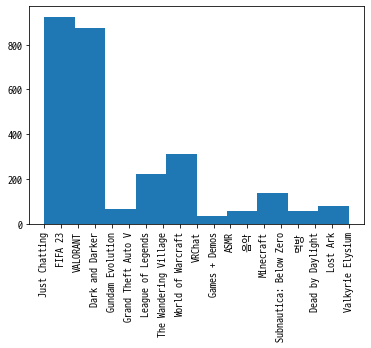

In [200]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [220]:
df_p = df[df['이름']=='침착맨 (zilioner)']
df_p

,이름,제목,시청자수,카테고리,일시
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),10500,Just Chatting,2022-09-27 19:05:04.699268
100,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),10500,Just Chatting,2022-09-27 19:10:04.966996
149,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),10500,Just Chatting,2022-09-27 19:15:04.654602
198,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),10500,Just Chatting,2022-09-27 19:20:05.715525
...,...,...,...,...,...
26814,침착맨 (zilioner),롤 (구독후원음성X),5990,League of Legends,2022-09-29 16:05:05.782439
26864,침착맨 (zilioner),롤 (구독후원음성X),5990,League of Legends,2022-09-29 16:10:05.323674
26914,침착맨 (zilioner),롤 (구독후원음성X),5984,League of Legends,2022-09-29 16:15:05.930315
26964,침착맨 (zilioner),롤 (구독후원음성X),5984,League of Legends,2022-09-29 16:20:05.282591


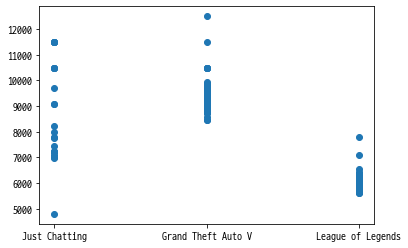

In [221]:
plt.scatter(df_p['카테고리'], df_p['시청자수'])

(array([24.,  0.,  0.,  0.,  0., 56.,  0.,  0.,  0., 36.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

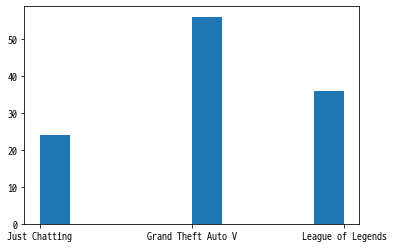

In [222]:
plt.hist(df_p['카테고리'])

In [223]:
df_p['카테고리'].value_counts()

Grand Theft Auto V    56
League of Legends     36
Just Chatting         24
Name: 카테고리, dtype: int64

### 시간대별로 집계할 수 있도록 전처리하자